<a href="https://colab.research.google.com/github/amar-naik/EVA/blob/master/S8/EVA4_S8_CIFAR10_ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/")
!ls

customDeepCNN.py		inctest.py	  testModel.py
data				inctrain.py	  training_model.py
dataTorchTransformLoad.py	resnet.py	  trainModel.py
EVA4_S8_CIFAR10_ResNet18.ipynb	testing_model.py  trg_model.py


In [4]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/'

total 1753
-rw------- 1 root root    4771 Mar  8 16:18 dataTorchTransformLoad.py
drwx------ 3 root root    4096 Mar  8 17:11 data
-rw------- 1 root root     837 Mar  8 19:24 inctrain.py
-rw------- 1 root root     731 Mar  8 19:26 inctest.py
-rw------- 1 root root    1635 Mar  8 20:16 training_model.py
-rw------- 1 root root     794 Mar  8 20:16 testing_model.py
-rw------- 1 root root    1629 Mar  9 11:26 trg_model.py
-rw------- 1 root root    4071 Mar  9 19:02 resnet.py
-rw------- 1 root root    3886 Mar  9 19:16 trainModel.py
-rw------- 1 root root    4002 Mar  9 21:00 customDeepCNN.py
-rw------- 1 root root    2665 Mar  9 21:38 testModel.py
-rw------- 1 root root 1763175 Mar  9 21:40 EVA4_S8_CIFAR10_ResNet18.ipynb


## 2.1 Add Googledrive path to the systempath  

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/')
#sys.path.append('/content/drive/My Drive/')


# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)
 5. ResNet Model


In [0]:
import dataTorchTransformLoad as dtl
import customDeepCNN as deep_cnn
import trainModel
import testModel
#import resnet as resnet

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py'

# 4. Train - Test Data Load with torch transforms

In [8]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',64)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [9]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


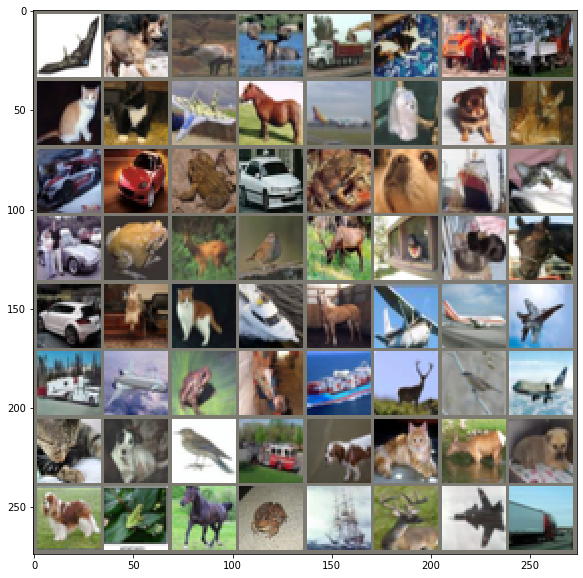

In [10]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 5. Load Model and print ModelSummary

In [11]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = deep_cnn.Net(no_input_channels = 3).to(device)
model = deep_cnn.ResNet18().to(device)
#model = resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

# 6. Run Models

## 6.1 Normal Run - No Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.742418050765991 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/trainModel.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.7023696899414062 Batch_id=781 Accuracy=53.50: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
/content/drive/My Drive/Colab Notebooks/S8 - CIFAR10-ResNet18/testModel.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
  0


Test set: Average loss: -4.4300, Accuracy: 6512/10000 (65.12%)

EPOCH: 1


Loss=0.9124302268028259 Batch_id=781 Accuracy=72.84: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.7060, Accuracy: 7329/10000 (73.29%)

EPOCH: 2


Loss=0.5563517808914185 Batch_id=781 Accuracy=79.84: 100%|██████████| 782/782 [00:36<00:00, 21.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.7569, Accuracy: 7881/10000 (78.81%)

EPOCH: 3


Loss=0.2616731822490692 Batch_id=781 Accuracy=83.95: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.4620, Accuracy: 8110/10000 (81.10%)

EPOCH: 4


Loss=0.8133910298347473 Batch_id=781 Accuracy=86.46: 100%|██████████| 782/782 [00:36<00:00, 21.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.4464, Accuracy: 7994/10000 (79.94%)

EPOCH: 5


Loss=1.0316734313964844 Batch_id=781 Accuracy=88.66: 100%|██████████| 782/782 [00:36<00:00, 21.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.3218, Accuracy: 8262/10000 (82.62%)

EPOCH: 6


Loss=0.19318442046642303 Batch_id=781 Accuracy=90.59: 100%|██████████| 782/782 [00:36<00:00, 22.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -10.2203, Accuracy: 8393/10000 (83.93%)

EPOCH: 7


Loss=0.37221741676330566 Batch_id=781 Accuracy=95.59: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -11.0964, Accuracy: 8806/10000 (88.06%)

EPOCH: 8


Loss=0.28297701478004456 Batch_id=781 Accuracy=96.68: 100%|██████████| 782/782 [00:36<00:00, 21.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -11.4420, Accuracy: 8821/10000 (88.21%)

EPOCH: 9


Loss=0.3780723512172699 Batch_id=781 Accuracy=97.33: 100%|██████████| 782/782 [00:36<00:00, 21.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -11.8176, Accuracy: 8833/10000 (88.33%)

EPOCH: 10


Loss=0.09422346949577332 Batch_id=781 Accuracy=97.83: 100%|██████████| 782/782 [00:36<00:00, 23.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.2000, Accuracy: 8826/10000 (88.26%)

EPOCH: 11


Loss=0.13564810156822205 Batch_id=781 Accuracy=98.35: 100%|██████████| 782/782 [00:36<00:00, 21.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.2122, Accuracy: 8842/10000 (88.42%)

EPOCH: 12


Loss=0.06980621814727783 Batch_id=781 Accuracy=98.77: 100%|██████████| 782/782 [00:36<00:00, 21.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.2474, Accuracy: 8844/10000 (88.44%)

EPOCH: 13


Loss=0.006887972354888916 Batch_id=781 Accuracy=98.90: 100%|██████████| 782/782 [00:36<00:00, 21.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.3592, Accuracy: 8868/10000 (88.68%)

EPOCH: 14


Loss=0.03308236598968506 Batch_id=781 Accuracy=98.91: 100%|██████████| 782/782 [00:36<00:00, 21.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.5177, Accuracy: 8867/10000 (88.67%)

EPOCH: 15


Loss=0.0845990777015686 Batch_id=781 Accuracy=98.93: 100%|██████████| 782/782 [00:36<00:00, 21.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.4770, Accuracy: 8845/10000 (88.45%)

EPOCH: 16


Loss=0.046633750200271606 Batch_id=781 Accuracy=98.97: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.4127, Accuracy: 8853/10000 (88.53%)

EPOCH: 17


Loss=0.02940434217453003 Batch_id=781 Accuracy=98.92: 100%|██████████| 782/782 [00:36<00:00, 22.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.4752, Accuracy: 8856/10000 (88.56%)

EPOCH: 18


Loss=0.016341984272003174 Batch_id=781 Accuracy=99.06: 100%|██████████| 782/782 [00:36<00:00, 23.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -12.4865, Accuracy: 8846/10000 (88.46%)

EPOCH: 19


Loss=0.011752545833587646 Batch_id=781 Accuracy=98.99: 100%|██████████| 782/782 [00:37<00:00, 20.86it/s]



Test set: Average loss: -12.4626, Accuracy: 8861/10000 (88.61%)



Text(0.5, 1.0, 'Test Accuracy')

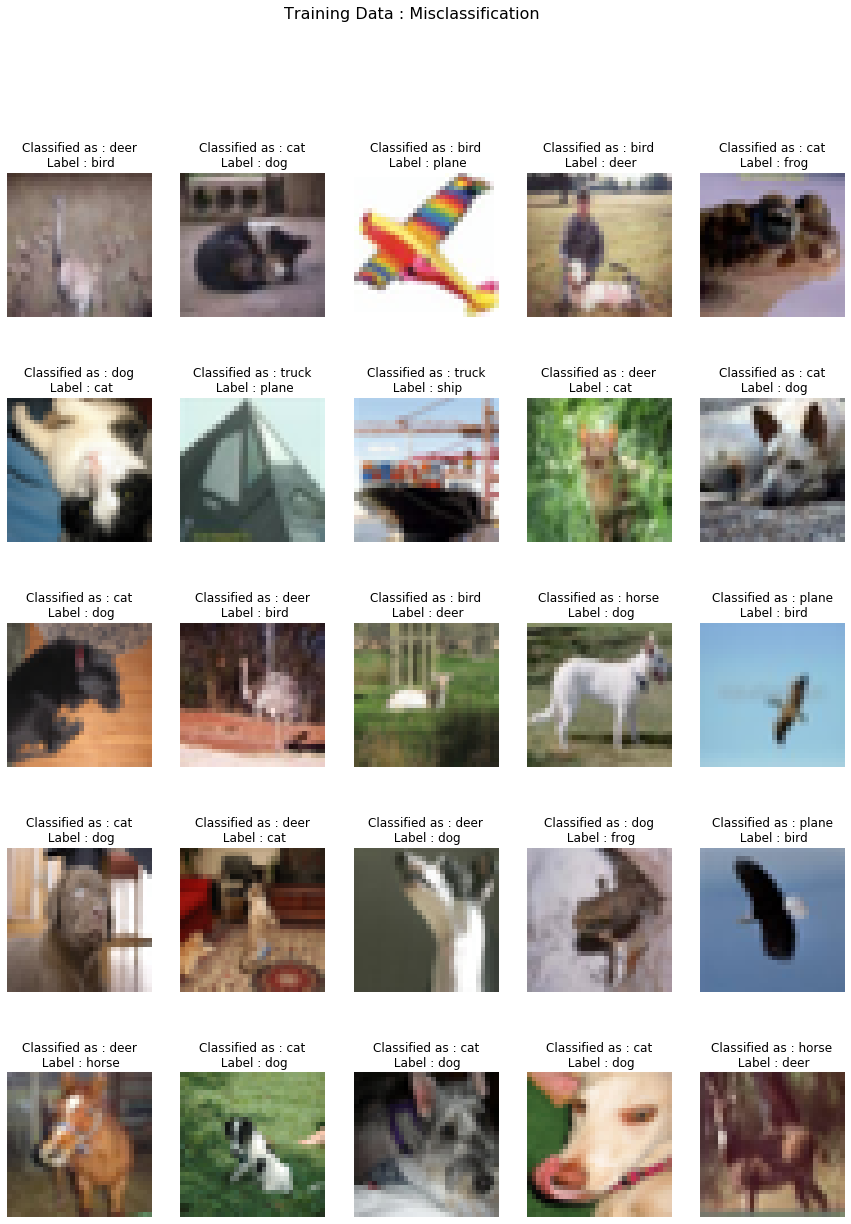

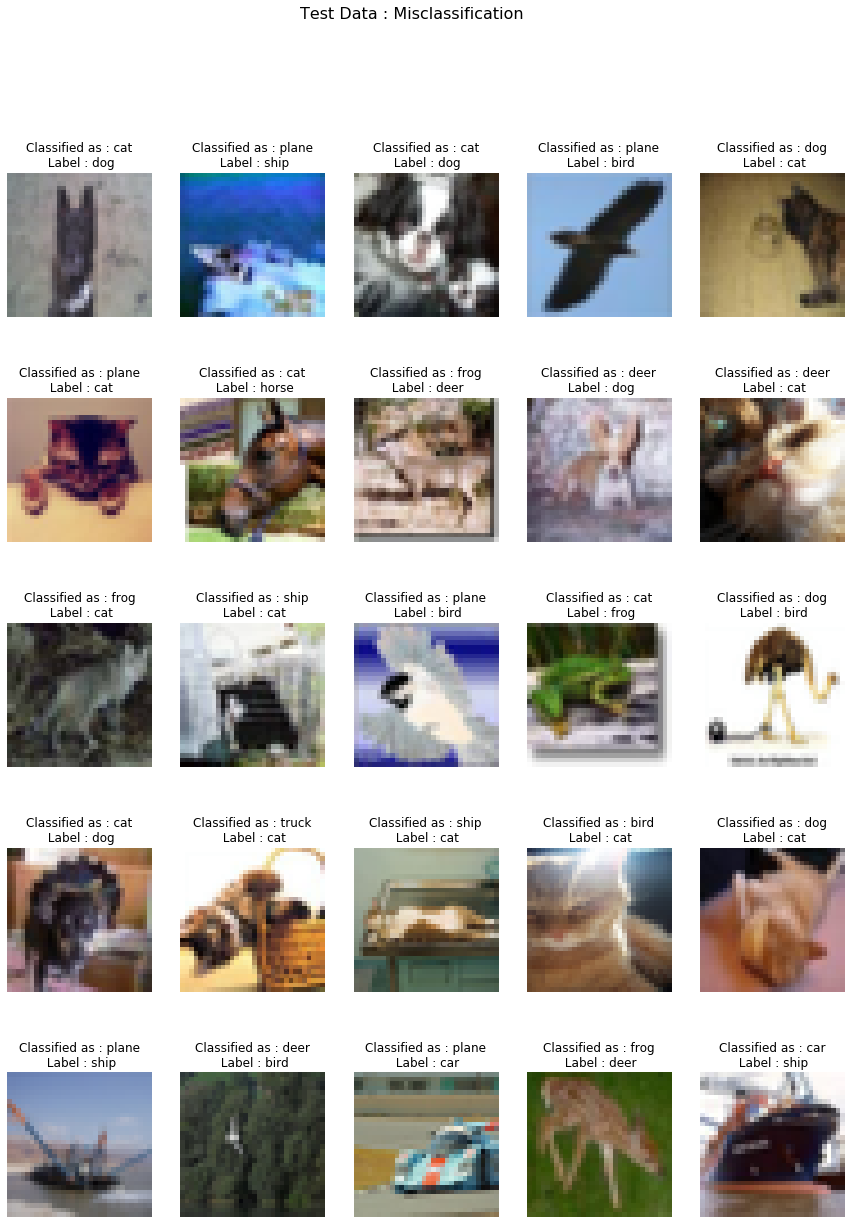

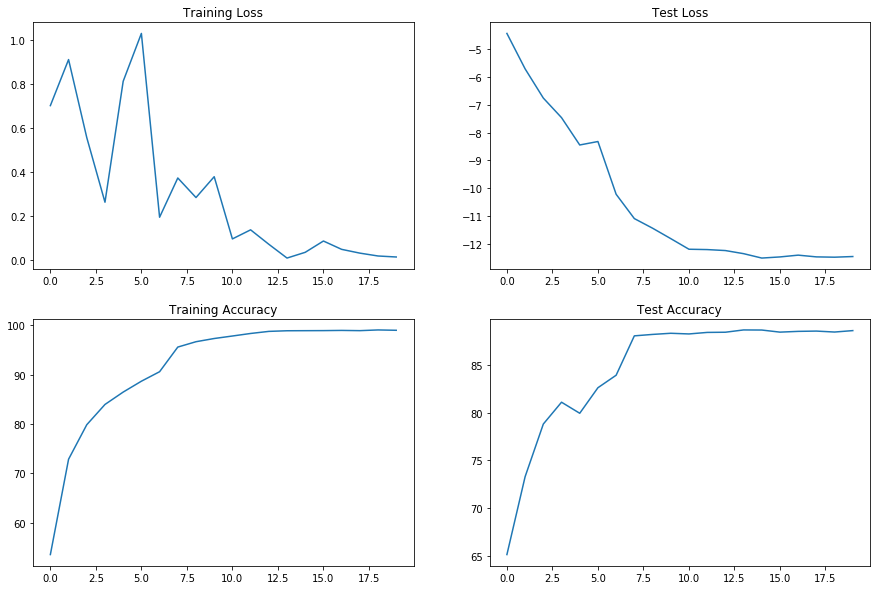

In [12]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
#model = deep_cnn.Net(no_input_channels = 3).to(device)
model = deep_cnn.ResNet18().to(device)
#model = resnet.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9,weight_decay = 5e-4)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")